Software for managing and analysing light curves of variable stars, coming from different surveys.

In [48]:
# Import libraries
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import astropy.units as u
from astropy.timeseries import LombScargle

In [2]:
plot_filter_labels = ['u', 'g', 'r', 'i', 'z', 'y']
plot_filter_colors = {'u': '#56b4e9', 'g': '#008060', 'r': '#ff4000',
                      'i': '#850000', 'z': '#6600cc', 'y': '#000000'}
plot_filter_symbols = {'u': 'o', 'g': '^', 'r': 'v', 'i': 's', 'z': '*', 'y': 'p'}

In [6]:
# Read LC datasets
lcDatasets = {}
lcDatasets['lsst'] = pd.read_pickle(os.path.join('data','lsst_RRLyr.pkl'))
lcDatasets['kepler'] = pd.read_csv(os.path.join('data','kepler_RRLyr.csv'))

In [7]:
# Inspect datasets
lcDatasets['lsst'].head()

,band,ccdVisitId,coord_ra,coord_dec,objectId,psfFlux,psfFluxErr,psfMag,ccdVisitId2,band2,expMidptMJD,zeroPoint
0,y,1032263018,62.462569,-44.11336,1251384969897480052,-515.183603,1697.218490,NaN,1032263018,y,61100.069706,30.602301
1,y,1033987172,62.462569,-44.11336,1251384969897480052,3151.738459,1686.955775,22.653625,1033987172,y,61102.068464,30.606100
2,u,675163080,62.462569,-44.11336,1251384969897480052,183.449123,209.242045,25.741211,675163080,u,60582.247144,30.469101
3,y,443055067,62.462569,-44.11336,1251384969897480052,-704.848327,1624.400086,NaN,443055067,y,60215.203585,30.612801
4,u,466722002,62.462569,-44.11336,1251384969897480052,382.472233,278.926670,24.943500,466722002,u,60261.078221,30.461201


In [9]:
lcDatasets['lsst'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11177 entries, 0 to 11176
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   band         11177 non-null  object 
 1   ccdVisitId   11177 non-null  int64  
 2   coord_ra     11177 non-null  float64
 3   coord_dec    11177 non-null  float64
 4   objectId     11177 non-null  int64  
 5   psfFlux      11177 non-null  float64
 6   psfFluxErr   11177 non-null  float64
 7   psfMag       10944 non-null  float64
 8   ccdVisitId2  11177 non-null  int64  
 9   band2        11177 non-null  object 
 10  expMidptMJD  11177 non-null  float64
 11  zeroPoint    11177 non-null  float32
dtypes: float32(1), float64(6), int64(3), object(2)
memory usage: 1004.3+ KB


In [8]:
lcDatasets['kepler'].head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,14,15,16,17,18,19,20,21,22,23
0,0,0.854429,0.842687,0.854582,0.811356,0.900239,1.589323,1.624727,1.394168,1.256477,...,0.829822,0.829018,0.841787,0.833914,0.975753,1.654578,1.535743,1.348626,1.227703,1.131386
1,1,1.214323,1.150384,1.103644,1.053931,1.002136,0.934727,0.883343,0.851310,0.842629,...,1.162523,1.123232,1.084385,1.032743,0.973835,0.915502,0.877194,0.849330,0.855227,0.844739
2,2,1.484069,1.364248,1.204081,1.103599,1.023989,0.953498,0.879883,0.822292,0.786437,...,1.634782,1.416098,1.237153,1.068694,0.974467,0.897048,0.841755,0.812668,0.798924,0.807088
3,3,1.030531,0.979492,0.945262,0.928918,0.930861,0.915334,0.857660,0.854018,1.350099,...,1.022408,0.983098,0.959695,0.955523,0.960613,0.921418,0.843822,0.838387,1.308091,1.455156
4,4,1.075254,1.011463,0.960214,0.918756,0.896586,0.859232,0.803375,0.913755,1.295979,...,1.026719,0.965212,0.919482,0.888925,0.873836,0.871134,0.810573,0.979131,1.343868,1.538732


In [10]:
lcDatasets['kepler'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  15 non-null     int64  
 1   0           15 non-null     float64
 2   1           15 non-null     float64
 3   2           15 non-null     float64
 4   3           15 non-null     float64
 5   4           15 non-null     float64
 6   5           15 non-null     float64
 7   6           15 non-null     float64
 8   7           15 non-null     float64
 9   8           15 non-null     float64
 10  9           15 non-null     float64
 11  10          15 non-null     float64
 12  11          15 non-null     float64
 13  12          15 non-null     float64
 14  13          15 non-null     float64
 15  14          15 non-null     float64
 16  15          15 non-null     float64
 17  16          15 non-null     float64
 18  17          15 non-null     float64
 19  18          15 non-null     flo

### Test period searching and visualization for LSST

In [12]:
len(lcDatasets['lsst']['objectId'].unique())

25

In [13]:
LC = lcDatasets['lsst']['objectId'].unique()[7]
LC = lcDatasets['lsst'][lcDatasets['lsst']['objectId']==LC]

In [14]:
bands = {}
for filter in plot_filter_labels:
    bands[filter] = (LC['band'] == filter)

In [15]:
len(LC)

421

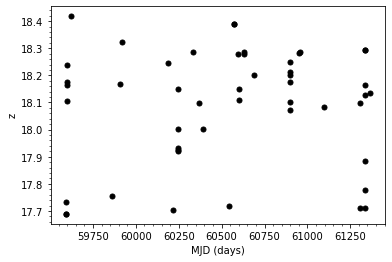

In [30]:
b = 'z'
plt.plot(LC[bands[b]]['expMidptMJD'].to_numpy(), 
         LC[bands[b]]['psfMag'].to_numpy(),'k.', ms=10)
plt.minorticks_on()
plt.xlabel('MJD (days)')
plt.ylabel(b)
plt.show()

In [34]:
mjd_days = {}
mags = {}
for filter in plot_filter_labels:
    mjd_days[filter] = np.array(LC[bands[filter]]['expMidptMJD']) * u.day
    mags[filter] = np.array(LC[bands[filter]]['psfMag'])

In [35]:
min_period = 0.2 * u.day
max_period = 1 * u.day

min_freq_search = 1.0 / max_period
max_freq_search = 1.0 / min_period

In [36]:
frequency = {}
power = {}
for filter in plot_filter_labels:
    frequency[filter], power[filter] =\
        LombScargle(mjd_days[filter], mags[filter]).autopower(minimum_frequency=min_freq_search,
                                                              maximum_frequency=max_freq_search)

In [37]:
all_peak_freqs = []

for filter in plot_filter_labels:
    # find the index with maximum power (= peakbin)
    peakbin = np.argmax(power[filter])

    # Store the frequency corresponding to the peak power in each filter (band)
    all_peak_freqs.append(frequency[filter][peakbin].value)

# Convert the frequencies from a list to and array:
all_peak_freqs = np.array(all_peak_freqs)

# Calculate the mean of the "best-fit" frequencies:
mean_peak_freq = np.mean(all_peak_freqs)

print('Mean frequency:', mean_peak_freq)
print('Mean period:', 1.0/mean_peak_freq, ' days')
print('\nugrizy frequency results:\n', all_peak_freqs)


Mean frequency: 2.178158712764198
Mean period: 0.45910336750940767  days

ugrizy frequency results:
 [2.17807944 2.17816158 2.17813256 2.17819998 2.178213   2.17816572]


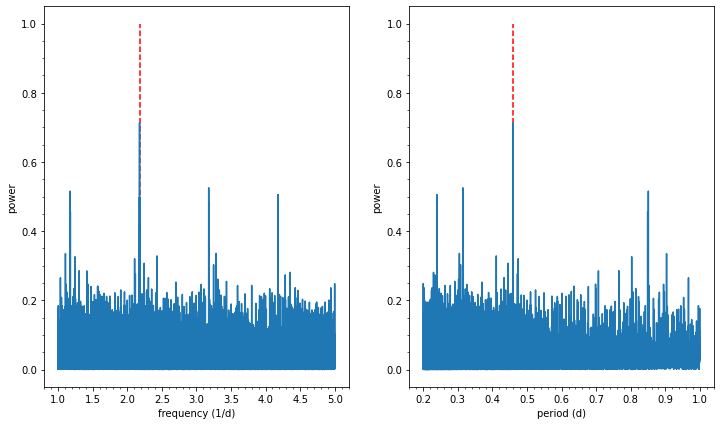

In [38]:
fig, ax = plt.subplots(1, 2, figsize=(12, 7))

plt.sca(ax[0])  # set the first axis as current

plt.plot(frequency['r'], power['r'])
plt.vlines(mean_peak_freq, 0, 1, linestyle='--', color='red')
plt.minorticks_on()
plt.xlabel('frequency (1/d)')
plt.ylabel('power')

plt.sca(ax[1])  # set the second axis as current
plt.plot(1 / frequency['r'], power['r'])
plt.vlines(1/mean_peak_freq, 0, 1, linestyle='--', color='red')
plt.minorticks_on()
plt.xlabel('period (d)')
plt.ylabel('power')
plt.show()

In [39]:
best_period = 1/2.1781

In [40]:
mjd_norm = {}
phase = {}

# Number of elapsed periods since the first measurement:
t0 = np.min(mjd_days['g'].value)

for filter in plot_filter_labels:
    mjd_norm[filter] = (mjd_days[filter].value - t0) / best_period

    # Calculate phase by using the modulus function:
    phase[filter] = np.mod(mjd_norm[filter], 1.0)

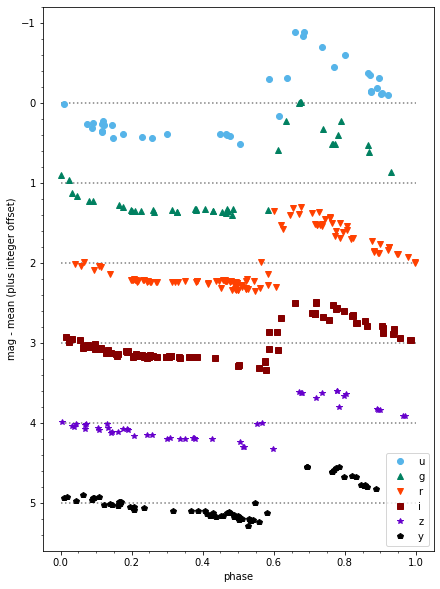

In [41]:
fig = plt.figure(figsize=(7, 10))     # create a matplotlib.pyplot figure

i = 0

for filter in plot_filter_labels:
    plt.plot(phase[filter], mags[filter]-np.mean(mags[filter]) + i,
             plot_filter_symbols[filter],
             color=plot_filter_colors[filter], label=filter)
    plt.hlines(i, 0, 1, linestyle=':', color='Gray')
    i += 1

plt.gca().invert_yaxis()
plt.legend()
plt.xlabel('phase')
plt.ylabel('mag - mean (plus integer offset)')
plt.minorticks_on()
plt.show()

### Test period searching and visualization for Kepler

In [42]:
len(lcDatasets['kepler'])

15

In [44]:
LC = lcDatasets['kepler'].iloc[0]

In [45]:
len(LC)

25

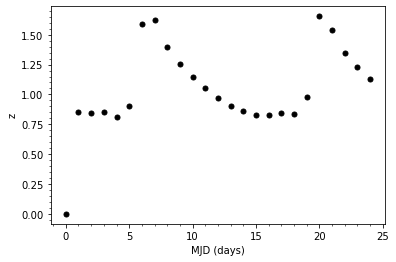

In [47]:
plt.plot(LC.to_numpy(),'k.', ms=10)
plt.minorticks_on()
plt.xlabel('MJD (days)')
plt.ylabel(b)
plt.show()

## Ideas for the software project

- "models.py":
 * def load_dataset
 * def mean_mag
 * def median_mag
 * def num_outliers
 * def calc_period
- "view.py"
 * def plot_unfolded
 * def plot_folded